# Sentiment Classifiers Binary:
#### This notebook contains various classifiers that can be used on a provided text dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
import keras
import sklearn
import csv
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import operator
import seaborn as sns
import pickle

C:\Users\Gabri\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
C:\Users\Gabri\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## This function is called by the classifiers to provide a visulization of the results
def plot_confusion_matrix(cm, classes, Y_test,
                          predictions,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print("Confusion Matrix:")
    print(cm)

    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],'d'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    print(classification_report(Y_test, predictions, target_names = classes))

### Complete -> Enter the name of the dataset you want to test into the file_in variable:
##### The file_out dataset is the name of the dataset that will stored the number converted version of the text data. Set the name of file_out to the name of the converted dataset if you already have a dataset that has numeric representations of the dataset already instead of words. Otherwise, file_out will be the output file name that is the converted data of the file_in dataset that gets read in for classification for the tensorflow model. Also, if you already have a converted file, make sure that re_read is set to 0 so that it does not get overwritten.

In [3]:
### Enter filenames below:
file_in = "problems_expertiza_balanced_final_combined.csv"
file_out = "problems_expertiza_balanced_final_combined_converted.csv"
### Enter column names for data and labels below:
data_col = "REVIEW"
label_col = "TAG"
### Set re_read to 0 if you already have a converted text file, 1 if it needs to be created
re_read = 0

In [4]:
df = pd.read_csv(file_in, engine = 'python');
df = df.dropna()
df = df.reset_index()
df = df.drop(columns = ['index'])
print(file_in)
print(df.dtypes)
print("Sample size:", len(df))
print(df.head(5))

problems_expertiza_balanced_final_combined.csv
TAG        int64
REVIEW    object
dtype: object
Sample size: 11170
   TAG                                             REVIEW
0    0  Great testing plan. They have worked on it ver...
1    0                          Test plan is pretty good.
2    0  The test plan is good and covers every details...
3    1  The team has done good job in test plan sectio...
4    1  They have visualization which are some tables ...


#### Setting up the data.

In [5]:
X = df[data_col]
Y = df[label_col]

In [266]:
######## START CONVERSION: Convert data to POS tags
# txt = nltk.word_tokenize(X[0])
# print(txt)
# txt = nltk.pos_tag(txt)
# print(txt)
# print()
# print(txt[1][1])
# print()
# x_data = []
# for i in range(len(txt)):
#     x_data.append(txt[i][1])
# txt = x_data
# print(' '.join(txt))

['Great', 'testing', 'plan', '.', 'They', 'have', 'worked', 'on', 'it', 'very', 'hard', 'to', 'give', 'a', 'thorough', 'test', 'plan', 'with', 'different', 'scenarios', 'in', 'mind', '.']
[('Great', 'NNP'), ('testing', 'VBG'), ('plan', 'NN'), ('.', '.'), ('They', 'PRP'), ('have', 'VBP'), ('worked', 'VBN'), ('on', 'IN'), ('it', 'PRP'), ('very', 'RB'), ('hard', 'RB'), ('to', 'TO'), ('give', 'VB'), ('a', 'DT'), ('thorough', 'JJ'), ('test', 'NN'), ('plan', 'NN'), ('with', 'IN'), ('different', 'JJ'), ('scenarios', 'NNS'), ('in', 'IN'), ('mind', 'NN'), ('.', '.')]

VBG

NNP VBG NN . PRP VBP VBN IN PRP RB RB TO VB DT JJ NN NN IN JJ NNS IN NN .


In [267]:
# X_pos = []
# for i in range(len(df)):
#     if (i % 1000 == 0):
#         print("Update:", i) # Check spot in data converter process
#     txt = nltk.word_tokenize(X[i])
#     txt = nltk.pos_tag(txt)
#     x_data = []
#     for j in range(len(txt)):
#         x_data.append(txt[j][1])
#     txt = ' '.join(x_data)
#     X_pos.append(txt)
# X = X_pos
# df[data_col] = X
######### END CONVERSTION

Update: 0
Update: 1000
Update: 2000
Update: 3000
Update: 4000
Update: 5000
Update: 6000
Update: 7000
Update: 8000
Update: 9000
Update: 10000
Update: 11000


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.1, random_state=42, stratify=df[label_col])
print("Train data amount:", len(X_train))
print("Test data amount:", len(X_test))

Train data amount: 10053
Test data amount: 1117


In [31]:
### Stemming
# from nltk.stem import *
# stemmer = PorterStemmer()
# new_xtr2 = []
# new_xte2 = []
# for sent in X_train:
#     sent = nltk.word_tokenize(sent)
#     sent = [stemmer.stem(w) for w in sent]
#     sent = " ".join(sent)
#     new_xtr2.append(sent)
# X_train = new_xtr2
# for sent in X_test:
#     sent = nltk.word_tokenize(sent)
#     sent = [stemmer.stem(w) for w in sent]
#     sent = " ".join(sent)
#     new_xte2.append(sent)
# X_test = new_xte2
# all_data = X_train + X_test

## Logistic Regression Classifier:

In [169]:
#### Logistic Regression
text_clf_log = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-log', LogisticRegression(solver='liblinear')),
])

In [10]:
text_clf_log = text_clf_log.fit(X_train,Y_train)

In [11]:
predicted_log = text_clf_log.predict(X_test)
accuracy = np.mean(predicted_log == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_log)
print(cm)

Accuracy: 0.8621307072515667
[[469  90]
 [ 64 494]]


Confusion Matrix:
[[469  90]
 [ 64 494]]


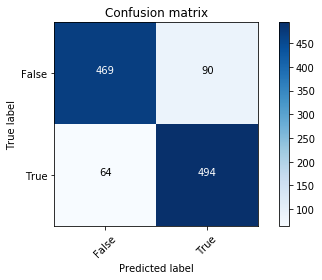

              precision    recall  f1-score   support

       False       0.88      0.84      0.86       559
        True       0.85      0.89      0.87       558

   micro avg       0.86      0.86      0.86      1117
   macro avg       0.86      0.86      0.86      1117
weighted avg       0.86      0.86      0.86      1117



In [12]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_log)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_log,
                      title='Confusion matrix')

### Gridsearch: Logistic Regression

In [194]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf-log__C': (10, 1, 1e-1),
              'clf-log__solver': ('liblinear', 'newton-cg', 'lbfgs'),
    }

In [262]:
text_clf_log.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-log', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-log__C', 'clf-log__class_weight', 'clf-log__dual', 'clf-log__fit_intercept', 'clf-log__intercept_scaling', 'clf-log__max_iter', 'clf-log__multi_class', 'clf-log__n_jobs', 'clf-log__penalty', 'clf-log__random_state', 'clf-log__solver', 'clf-log__tol', 'clf-log__verbose', 'clf-log__warm_start'])

In [263]:
## Cross-validation and fit
gs_clf_log = GridSearchCV(text_clf_log, parameters, cv=5, n_jobs=-1)
gs_clf_log = gs_clf_log.fit(X_train,Y_train)
predicted_gs = gs_clf_log.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

In [264]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.8753605888789416
{'clf-log__C': 10, 'clf-log__solver': 'liblinear', 'vect__ngram_range': (1, 2)}
Accuracy: 0.88272157564906


Confusion Matrix:
[[479  80]
 [ 51 507]]


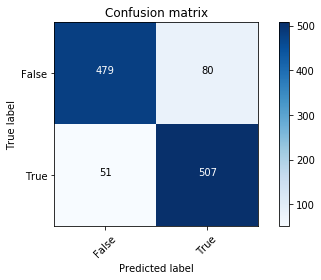

              precision    recall  f1-score   support

       False       0.90      0.86      0.88       559
        True       0.86      0.91      0.89       558

   micro avg       0.88      0.88      0.88      1117
   macro avg       0.88      0.88      0.88      1117
weighted avg       0.88      0.88      0.88      1117



In [265]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Random Forest Classifier

In [170]:
#### Random Forest
text_clf_rfc = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-rfc', RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)),
])

In [274]:
text_clf_rfc = text_clf_rfc.fit(X_train,Y_train)

In [275]:
predicted_rfc = text_clf_rfc.predict(X_test)
accuracy = np.mean(predicted_rfc == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_rfc)
print(cm)

Accuracy: 0.720680393912265
[[416 143]
 [169 389]]


Confusion Matrix:
[[416 143]
 [169 389]]


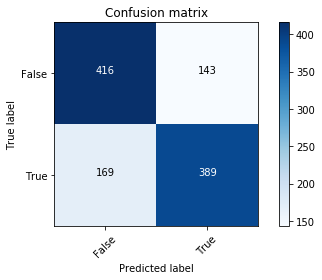

              precision    recall  f1-score   support

       False       0.71      0.74      0.73       559
        True       0.73      0.70      0.71       558

   micro avg       0.72      0.72      0.72      1117
   macro avg       0.72      0.72      0.72      1117
weighted avg       0.72      0.72      0.72      1117



In [276]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_rfc)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_rfc,
                      title='Confusion matrix')

### Gridsearch: Random Forest

In [195]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf-rfc__max_depth': (2, 3, 4),
              'clf-rfc__criterion': ("gini", "entropy"),
              'clf-rfc__n_estimators': (100, 200, 300),
    }

In [22]:
text_clf_rfc.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-rfc', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-rfc__bootstrap', 'clf-rfc__class_weight', 'clf-rfc__criterion', 'clf-rfc__max_depth', 'clf-rfc__max_features', 'clf-rfc__max_leaf_nodes', 'clf-rfc__min_impurity_decrease', 'clf-rfc__min_impurity_split', 'clf-rfc__min_samples_leaf', 'clf-rfc__min_samples_split', 'clf-rfc__min_weight_fraction_leaf', 'clf-rfc__n_estimators', 'clf-rfc__n_jobs', 'clf-rfc__oob_score', 'clf-rfc__random_state', 'clf-rfc__verbose', 'clf-rfc__warm_start'])

In [23]:
## Cross-validation and fit
gs_clf_rfc = GridSearchCV(text_clf_rfc, parameters, cv=5, n_jobs=-1)
gs_clf_rfc = gs_clf_rfc.fit(X_train,Y_train)
predicted_gs = gs_clf_rfc.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

In [24]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.7233809001097695
{'clf-rfc__criterion': 'gini', 'clf-rfc__max_depth': 4, 'clf-rfc__n_estimators': 100, 'vect__ngram_range': (1, 1)}
Accuracy: 0.7269736842105263


Confusion Matrix:
[[147  12]
 [ 71  74]]


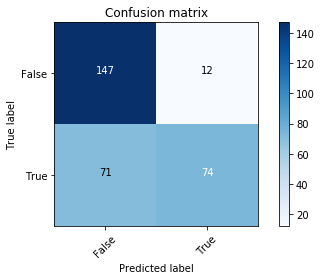

              precision    recall  f1-score   support

       False       0.67      0.92      0.78       159
        True       0.86      0.51      0.64       145

   micro avg       0.73      0.73      0.73       304
   macro avg       0.77      0.72      0.71       304
weighted avg       0.76      0.73      0.71       304



In [25]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Multinomial Naive Bayes classifier:

In [219]:
#### Multinomial Naive Bayes
text_clf_mnb = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-mnb', MultinomialNB()),
])

In [220]:
text_clf_mnb = text_clf_mnb.fit(X_train,Y_train)

In [221]:
predicted_mnb = text_clf_mnb.predict(X_test)
accuracy = np.mean(predicted_mnb == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_mnb)
print(cm)

Accuracy: 0.8513876454789615
[[446 112]
 [ 54 505]]


Confusion Matrix:
[[446 112]
 [ 54 505]]


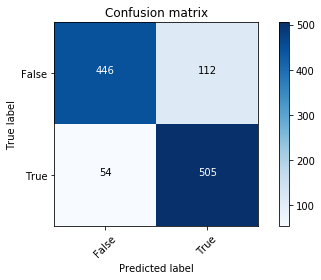

              precision    recall  f1-score   support

       False       0.89      0.80      0.84       558
        True       0.82      0.90      0.86       559

   micro avg       0.85      0.85      0.85      1117
   macro avg       0.86      0.85      0.85      1117
weighted avg       0.86      0.85      0.85      1117



In [222]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_mnb)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_mnb,
                      title='Confusion matrix')

### Gridsearch: Multinomial Naive Bayes

In [267]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
              'clf-mnb__alpha': (0, 1e-1, 1e-2),
    }

In [268]:
text_clf_mnb.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-mnb', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-mnb__alpha', 'clf-mnb__class_prior', 'clf-mnb__fit_prior'])

In [269]:
## Cross-validation and fit
gs_clf_mnb = GridSearchCV(text_clf_mnb, parameters, cv=5)
gs_clf_mnb = gs_clf_mnb.fit(X_train,Y_train)
predicted_gs = gs_clf_mnb.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\s

In [270]:
print("Grid search best score:", gs_clf_mnb.best_score_)
print(gs_clf_mnb.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.8416228903543087
{'clf-mnb__alpha': 0.1, 'vect__ngram_range': (1, 2)}
Accuracy: 0.8710832587287377


Confusion Matrix:
[[472  86]
 [ 58 501]]


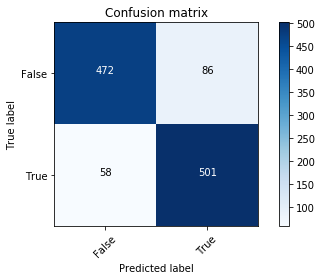

              precision    recall  f1-score   support

       False       0.89      0.85      0.87       558
        True       0.85      0.90      0.87       559

   micro avg       0.87      0.87      0.87      1117
   macro avg       0.87      0.87      0.87      1117
weighted avg       0.87      0.87      0.87      1117



In [271]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Complement Naive Bayes classifier:

In [254]:
#### Complement Naive Bayes
text_clf_cnb = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-cnb', ComplementNB()),
])

In [255]:
text_clf_cnb = text_clf_cnb.fit(X_train,Y_train)

In [257]:
predicted_cnb = text_clf_cnb.predict(X_test)
accuracy = np.mean(predicted_cnb == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_cnb)
print(cm)

Accuracy: 0.8513876454789615
[[446 112]
 [ 54 505]]


Confusion Matrix:
[[446 112]
 [ 54 505]]


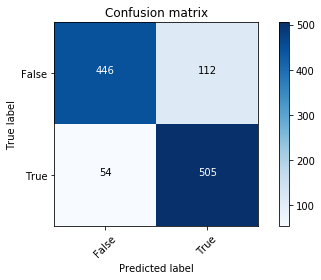

              precision    recall  f1-score   support

       False       0.89      0.80      0.84       558
        True       0.82      0.90      0.86       559

   micro avg       0.85      0.85      0.85      1117
   macro avg       0.86      0.85      0.85      1117
weighted avg       0.86      0.85      0.85      1117



In [258]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_cnb)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_cnb,
                      title='Confusion matrix')

### Gridsearch: Complement Naive Bayes

In [259]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
              'clf-cnb__alpha': (0, 1e-1, 1e-2),
    }

In [261]:
text_clf_cnb.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-cnb', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-cnb__alpha', 'clf-cnb__class_prior', 'clf-cnb__fit_prior', 'clf-cnb__norm'])

In [263]:
## Cross-validation and fit
gs_clf_cnb = GridSearchCV(text_clf_cnb, parameters, cv=5)
gs_clf_cnb = gs_clf_cnb.fit(X_train,Y_train)
predicted_gs = gs_clf_cnb.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\s

In [265]:
print("Grid search best score:", gs_clf_cnb.best_score_)
print(gs_clf_cnb.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.8415111210461608
{'clf-cnb__alpha': 0.1, 'vect__ngram_range': (1, 2)}
Accuracy: 0.8710832587287377


Confusion Matrix:
[[472  86]
 [ 58 501]]


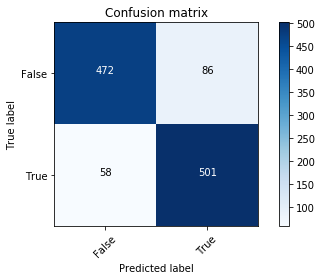

              precision    recall  f1-score   support

       False       0.89      0.85      0.87       558
        True       0.85      0.90      0.87       559

   micro avg       0.87      0.87      0.87      1117
   macro avg       0.87      0.87      0.87      1117
weighted avg       0.87      0.87      0.87      1117



In [266]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## AdaBoost Classifier:

In [22]:
#### AdaBoost
text_clf_adb = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-adb', AdaBoostClassifier(learning_rate = 0.8, n_estimators = 170)),
])

In [23]:
text_clf_adb = text_clf_adb.fit(X_train,Y_train)

In [24]:
predicted_adb = text_clf_adb.predict(X_test)
accuracy = np.mean(predicted_adb == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_adb)
print(cm)

Accuracy: 0.8460161145926589
[[472  87]
 [ 85 473]]


Confusion Matrix:
[[471  88]
 [ 85 473]]


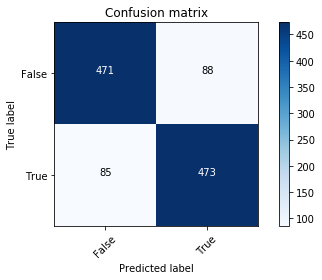

              precision    recall  f1-score   support

       False       0.85      0.84      0.84       559
        True       0.84      0.85      0.85       558

   micro avg       0.85      0.85      0.85      1117
   macro avg       0.85      0.85      0.85      1117
weighted avg       0.85      0.85      0.85      1117



In [18]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_adb)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_adb,
                      title='Confusion matrix')

### Gridsearch: AdaBoost

In [25]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
              'clf-adb__n_estimators': (140, 160),
#               'clf-adb__learning_rate': (0.6, 0.8),
    }

In [404]:
text_clf_adb.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-adb', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-adb__algorithm', 'clf-adb__base_estimator', 'clf-adb__learning_rate', 'clf-adb__n_estimators', 'clf-adb__random_state'])

In [405]:
## Cross-validation and fit
gs_clf_adb = GridSearchCV(text_clf_adb, parameters, cv=5)
gs_clf_adb = gs_clf_adb.fit(X_train,Y_train)
predicted_gs = gs_clf_adb.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

In [406]:
print("Grid search best score:", gs_clf_adb.best_score_)
print(gs_clf_adb.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.8454230468313401
{'clf-adb__learning_rate': 0.8, 'clf-adb__n_estimators': 160, 'vect__ngram_range': (1, 2)}
Accuracy: 0.864816472694718


Confusion Matrix:
[[490  68]
 [ 83 476]]


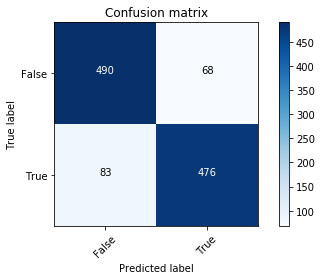

              precision    recall  f1-score   support

       False       0.86      0.88      0.87       558
        True       0.88      0.85      0.86       559

   micro avg       0.86      0.86      0.86      1117
   macro avg       0.87      0.86      0.86      1117
weighted avg       0.87      0.86      0.86      1117



In [407]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Gradient Boosting Classifier:

In [101]:
#### Gradient Boosting
text_clf_gdb = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-gdb', AdaBoostClassifier(learning_rate = 0.9, n_estimators = 100)),
])

In [92]:
text_clf_gdb = text_clf_gdb.fit(X_train,Y_train)

In [93]:
predicted_gdb = text_clf_gdb.predict(X_test)
accuracy = np.mean(predicted_gdb == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_gdb)
print(cm)

Accuracy: 0.8603401969561325
[[482  76]
 [ 80 479]]


Confusion Matrix:
[[482  76]
 [ 80 479]]


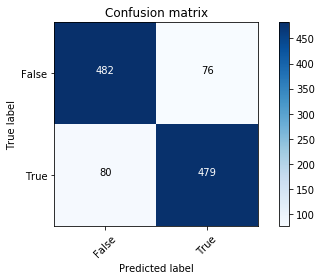

              precision    recall  f1-score   support

       False       0.86      0.86      0.86       558
        True       0.86      0.86      0.86       559

   micro avg       0.86      0.86      0.86      1117
   macro avg       0.86      0.86      0.86      1117
weighted avg       0.86      0.86      0.86      1117



In [94]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gdb)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gdb,
                      title='Confusion matrix')

### Gridsearch: AdaBoost

In [100]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
              'clf-gdb__n_estimators': (100, 150),
#               'clf-adb__learning_rate': (0.7, 0.9),
    }

In [96]:
text_clf_gdb.get_params().keys() a b c ab bc

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-gdb', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-gdb__algorithm', 'clf-gdb__base_estimator', 'clf-gdb__learning_rate', 'clf-gdb__n_estimators', 'clf-gdb__random_state'])

In [97]:
## Cross-validation and fit
gs_clf_gdb = GridSearchCV(text_clf_gdb, parameters, cv=5)
gs_clf_gdb = gs_clf_gdb.fit(X_train,Y_train)
predicted_gs = gs_clf_gdb.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

In [98]:
print("Grid search best score:", gs_clf_gdb.best_score_)
print(gs_clf_gdb.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.8411758131217167
{'clf-gdb__n_estimators': 150, 'vect__ngram_range': (1, 2)}
Accuracy: 0.8594449418084154


Confusion Matrix:
[[487  71]
 [ 86 473]]


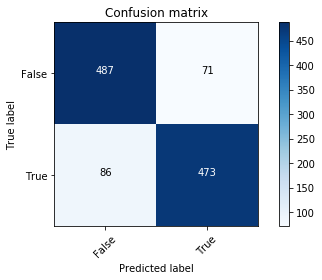

              precision    recall  f1-score   support

       False       0.85      0.87      0.86       558
        True       0.87      0.85      0.86       559

   micro avg       0.86      0.86      0.86      1117
   macro avg       0.86      0.86      0.86      1117
weighted avg       0.86      0.86      0.86      1117



In [99]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Support Vector Machine classifier:

In [172]:
#### Support Vector Machine
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SVC(C=1.0, kernel='linear')), 
                    ])

In [282]:
text_clf_svm = text_clf_svm.fit(X_train,Y_train)

In [283]:
predicted_svm = text_clf_svm.predict(X_test)
accuracy = np.mean(predicted_svm == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_svm)
print(cm)

Accuracy: 0.7269471799462847
[[397 162]
 [143 415]]


Confusion Matrix:
[[367 192]
 [135 423]]


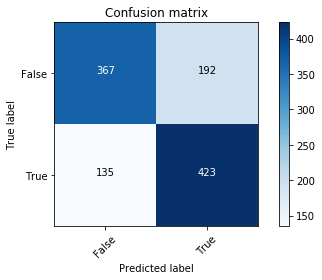

              precision    recall  f1-score   support

       False       0.74      0.71      0.72       559
        True       0.72      0.74      0.73       558

   micro avg       0.73      0.73      0.73      1117
   macro avg       0.73      0.73      0.73      1117
weighted avg       0.73      0.73      0.73      1117



In [284]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_svm)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_svm,
                      title='Confusion matrix')

### Gridsearch: Support Vector Machine

In [197]:
#### Gridsearch
## To save time, do sigmoid with degree separately from other kernels
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf-svm__C': (10, 1, 1e-1),
    }

In [40]:
text_clf_svm.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-svm', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-svm__C', 'clf-svm__cache_size', 'clf-svm__class_weight', 'clf-svm__coef0', 'clf-svm__decision_function_shape', 'clf-svm__degree', 'clf-svm__gamma', 'clf-svm__kernel', 'clf-svm__max_iter', 'clf-svm__probability', 'clf-svm__random_state', 'clf-svm__shrinking', 'clf-svm__tol', 'clf-svm__verbose'])

In [41]:
## Cross-validation and fit
gs_clf_svm = GridSearchCV(text_clf_svm, parameters, cv=5, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train,Y_train)
predicted_gs = gs_clf_svm.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

In [42]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.7998536406878888
{'clf-svm__C': 1, 'vect__ngram_range': (1, 2)}
Accuracy: 0.8388157894736842


Confusion Matrix:
[[132  27]
 [ 22 123]]


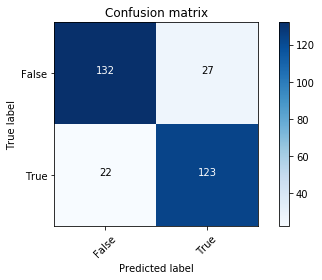

              precision    recall  f1-score   support

       False       0.86      0.83      0.84       159
        True       0.82      0.85      0.83       145

   micro avg       0.84      0.84      0.84       304
   macro avg       0.84      0.84      0.84       304
weighted avg       0.84      0.84      0.84       304



In [43]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Stochastic Gradient Decent (SVM) classifier:

In [173]:
#### Stochastic Gradient Descent (SVM hinge loss) !!! STEMMING REDUCES 2% !!!
text_clf_sgd = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-sgd', SGDClassifier(loss='hinge', # modified_huber
                                                  penalty='l2',
                                                  max_iter=5,
                                                  random_state=42)), 
                    ])

In [286]:
_ = text_clf_sgd.fit(X_train,Y_train)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [287]:
predicted_sgd = text_clf_sgd.predict(X_test)
accuracy = np.mean(predicted_sgd == Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7224709042076992


Confusion Matrix:
[[458 101]
 [209 349]]


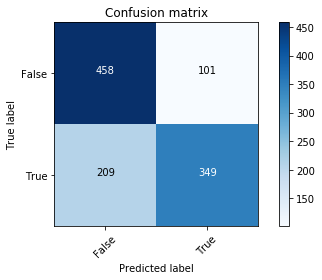

              precision    recall  f1-score   support

       False       0.69      0.82      0.75       559
        True       0.78      0.63      0.69       558

   micro avg       0.72      0.72      0.72      1117
   macro avg       0.73      0.72      0.72      1117
weighted avg       0.73      0.72      0.72      1117



In [288]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_sgd)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_sgd,
                      title='Confusion matrix')

### Gridsearch: Stochastic Gradient Descent

In [198]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
              'clf-sgd__alpha': (1e-2, 1e-3, 1e-4),
              'clf-sgd__l1_ratio': (0, 0.15, 1)
              #'clf-sgd__learning_rate': (1, 1e-1, 1e-2, 1e-3, 1e-4),
    }

In [49]:
text_clf_sgd.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-sgd', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-sgd__alpha', 'clf-sgd__average', 'clf-sgd__class_weight', 'clf-sgd__early_stopping', 'clf-sgd__epsilon', 'clf-sgd__eta0', 'clf-sgd__fit_intercept', 'clf-sgd__l1_ratio', 'clf-sgd__learning_rate', 'clf-sgd__loss', 'clf-sgd__max_iter', 'clf-sgd__n_iter', 'clf-sgd__n_iter_no_change', 'clf-sgd__n_jobs', 'clf-sgd__penalty', 'clf-sgd__power_t', 'clf-sgd__random_state', 'clf-sgd__shuffle', 'clf-sgd__tol', 'clf-sgd__validation_fraction', 'clf-sgd__verbose', 'clf-sgd__warm_start'])

In [50]:
## Cross-validation and fit
gs_clf_sgd = GridSearchCV(text_clf_sgd, parameters, cv=5)
gs_clf_sgd = gs_clf_sgd.fit(X_train,Y_train)
predicted_gs = gs_clf_sgd.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [51]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

Grid search best score: 0.8024149286498353
{'clf-sgd__alpha': 0.001, 'clf-sgd__l1_ratio': 0, 'vect__ngram_range': (1, 2)}
Accuracy: 0.8651315789473685


Confusion Matrix:
[[138  21]
 [ 20 125]]


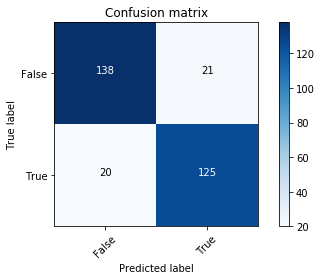

              precision    recall  f1-score   support

       False       0.87      0.87      0.87       159
        True       0.86      0.86      0.86       145

   micro avg       0.87      0.87      0.87       304
   macro avg       0.86      0.86      0.86       304
weighted avg       0.87      0.87      0.87       304



In [52]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Classifier Sample Generator

In [102]:
#### Collect f1-scores of the 30 train/test splits of the dataset
# classifiers = [text_clf_log, text_clf_rfc, text_clf_mnb, text_clf_svm, text_clf_sgd] # No gridsearch
classifiers = [gs_clf_log, gs_clf_rfc, gs_clf_mnb, gs_clf_svm, gs_clf_sgd, gs_clf_adb, gs_clf_gdb] # With gridsearch
classifier_names = ["Log", "RF", "MNB", "SVM", "SGD", "ADB", "GDB"]
# classifiers = [gs_clf_gdb] # With gridsearch
# classifier_names = ["GDB"]
all_classifier_f1scores = []
for i in range(len(classifiers)):
    classifier_f1scores = []
    model = classifiers[i]
    for j in range(1, 31):
        if (j % 5 == 0):
            print("On round:", j)
        # Retrieve dataset and split the data into train-validation-test splits of approximately 80-10-10%
        stratified_file = "problems_expertiza_randomized_fullsplit" + str(j) + ".csv"
        df = pd.read_csv(stratified_file, engine = 'python');
        X_train = df["REVIEW"][:8947]
        X_val = df["REVIEW"][8947:10053]
        X_test = df["REVIEW"][10053:]
        Y_train = df["TAG"][:8947]
        Y_val = df["TAG"][8947:10053]
        Y_test = df["TAG"][10053:]
        # Train and test a classifier to get its performance
        model = model.fit(X_train,Y_train)
        predicted = model.predict(X_test)
        # Retreive the f1-score metric and append this to the list of obtained classifier scores
        rep = classification_report(Y_test, predicted, target_names = class_names, output_dict = True)
        f1score = rep['weighted avg']['f1-score']
        classifier_f1scores.append(f1score)
    # Save classifier results and add it to the list of classifiers results
    pickle.dump(classifier_f1scores, open(classifier_names[i] + "_f1scores_OTHER", "wb"))
    all_classifier_f1scores.append(classifier_f1scores)

On round: 5
On round: 10
On round: 15
On round: 20
On round: 25
On round: 30


### Boxplot Visualization and Summary Statistics

In [107]:
read_in = False
def load_classifier_f1scores():
    all_classifier_f1scores = []
    classifier_names = ["Log", "RF", "MNB", "SVM", "SGD", "ADB", "GDB"]
    for name in classifier_names:
        classifier_f1scores = pickle.load(open(name + "_f1scores", "rb"))
        all_classifier_f1scores.append(classifier_f1scores)
    return all_classifier_f1scores
if(read_in):
    all_classifier_f1scores = load_classifier_f1scores()

In [119]:
## Sorting (manually) classifiers by median f1-score
cn = classifier_names
classifier_names = [cn[1], cn[2], cn[6], cn[5], cn[0], cn[4], cn[3]]
acl = all_classifier_f1scores
all_classifier_f1scores = [acl[1], acl[2], acl[6], acl[5], acl[0], acl[4], acl[3]]

C:\Users\Gabri\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


<Figure size 432x288 with 0 Axes>

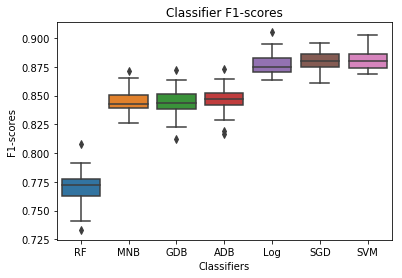

In [120]:
## Graphical Visualization of f1-scores for classifiers
stats_df = pd.DataFrame(all_classifier_f1scores)
stats_df = stats_df.transpose()
stats_df.columns = classifier_names
plt.clf()
fig1, ax1 = plt.subplots()
ax1.set_title("Classifier F1-scores")
sns.boxplot(x="variable", y="value", data=pd.melt(stats_df))
plt.xlabel("Classifiers")
plt.ylabel("F1-scores")
plt.show()

In [121]:
## Summary Statistics
summary_stats = (stats_df.describe())
print(round(summary_stats, 3))
# summary_stats["GDB"]["mean"]

           RF     MNB     GDB     ADB     Log     SGD     SVM
count  30.000  30.000  30.000  30.000  30.000  30.000  30.000
mean    0.770   0.844   0.844   0.847   0.877   0.880   0.881
std     0.015   0.011   0.012   0.012   0.010   0.009   0.009
min     0.733   0.826   0.812   0.816   0.864   0.861   0.869
25%     0.763   0.839   0.838   0.842   0.870   0.875   0.874
50%     0.772   0.842   0.843   0.847   0.875   0.880   0.880
75%     0.778   0.850   0.851   0.853   0.882   0.886   0.886
max     0.808   0.871   0.872   0.873   0.905   0.896   0.902


## Neural Network Setup

#### Create a numeric version of this text data set if not present (uncomment below if to do so). Also determines length of vocabulary to use for embedding layer size:

In [66]:
# Create the word mappings
def bagofwords():
    num_data = len(df)
    a = []
    loop = 0
    for loop in range(num_data):
        if (loop % 50000 == 0): # For larger datasets
            print("Update:", loop) # Check spot in dictionary creator
        comment = df[data_col][loop]
        sentTok = nltk.sent_tokenize(comment)
        for sentence in sentTok:
            a.append(sentence)    
    a = (' '.join(a)).lower()
    text = nltk.word_tokenize(a)
    newset = set()
    for word in text:
        newset.add(word)
    # Fill in found words
    word_to_ix = { w:(i+4) for i,w in enumerate(sorted(newset)) }
    ix_to_word = { (i+4):w for i,w in enumerate(sorted(newset)) }
    # Fill in reserved values
    ix_to_word[0] = "<PAD>"
    ix_to_word[1] = "<START>"
    ix_to_word[2] = "<UNK>"
    ix_to_word[3] = "<UNUSED>"
    word_to_ix["<PAD>"] = 0 # Used to equalize text length
    word_to_ix["<START>"] = 1
    word_to_ix["<UNK>"] = 2  # unknown value
    word_to_ix["<UNUSED>"] = 3
    return word_to_ix, ix_to_word

In [67]:
word_to_ix, ix_to_word = bagofwords()
# print(ix_to_word[3853])
# print(word_to_ix["please"]) # Ensure word is in dictionary
print("Size of vocabulary:", len(ix_to_word))

Update: 0
Size of vocabulary: 6082


##### An update text will be printed in order to keep track of the conversion process.

In [68]:
## Convert original data to number representations
if (re_read == 1):
    num_data = len(df)
    loop = 0
    converted_text_data = []
    print("Total to print:", num_data)
    for loop in range(num_data):
        if (loop % 50000 == 0): # For larger datasets
            print("Update:", loop) # Check spot in converter
        comment = df[data_col][loop]
        if isinstance(comment, str) == False: # Skip missing text from dataset if present
            continue
        comment = comment.lower()
        text = nltk.word_tokenize(comment)
        length = len(text)
        i = 0
        for i in range(length):
            try:
                text[i] = word_to_ix[text[i]]
            except KeyError:
                text[i] = 2 # Unknown mapping
        text = [int(i) for i in text]
        converted_text_data.append(text)

Total to print: 3037
Update: 0


In [69]:
if (re_read == 1):
    with open(file_out, 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow([data_col, label_col])
        i = 0
        for i in range(num_data):
            if (i % 50000 == 0): # For larger datasets
                print("Update:", i) # Check spot in converter
            rev = converted_text_data[i]
            label = df[label_col][i]
            ### Below tow lines are optional
#             if (label != 1):
#                 label = 0
            writer.writerow([rev, label])

Update: 0


In [70]:
if (re_read == 1):
    print(len(df))
    print(len(converted_text_data))

3037
3037


#### Read in the converted text to number dataset, shuffle data, and run the classifier:

In [71]:
df = pd.read_csv(file_out, engine = 'python');
print(file_out)
print(df.dtypes)
np.random.seed(42) # Keep permutation assortment the same
df = df.iloc[np.random.permutation(len(df))]
df = df.reset_index(drop=True)
print("Sample size:", len(df))

problems_expertiza_balanced_spring2019_converted.csv
REVIEW    object
TAG        int64
dtype: object
Sample size: 3037


In [72]:
## Parses the integer list data from file into a proper integer list for the classifier
full_data = []
for dat in df[data_col]:
    paragraph = []
    sentence = []
    for letter in dat:
        if (letter == '[' or letter == ']' or letter == ' '):
            continue
        elif (letter == ','):
            sentence = (''.join(sentence))
            paragraph.append(sentence)
            sentence = []
        else:
            sentence.append(letter)
    paragraph = [int(i) for i in paragraph]
    full_data.append(paragraph)
print("Dataset length:", len(full_data))

Dataset length: 3037


In [73]:
## Initialize train and test data, train and test labels
num_data = len(df)
num_train = int(num_data * 0.9) # df.head this amount
num_test = int(num_data - num_train) # df.tail this amount
train_data = full_data[:num_train]
test_data = full_data[num_train:]
train_labels = df[label_col].head(num_train) # is_prompt_exists
test_labels = df[label_col].tail(num_test)
print("Number train data:", len(train_data))
print("Number test data:", len(test_data))

Number train data: 2733
Number test data: 304


In [74]:
## Find the maximum sentence length to use for padding training data
maxlength = 0
data_lengths = []
for i in range(len(full_data)):
    data_lengths.append(len(full_data[i]))
    maxlength = max(len(full_data[i]), maxlength)
#     if maxlength > 4000:
#         print(i)
print("Max text length:", maxlength)
print("Average text length:", np.average(data_lengths))
print("Median text length:", np.median(data_lengths))

Max text length: 1176
Average text length: 45.90253539677313
Median text length: 30.0


In [78]:
numabove = 0
for i in range(len(data_lengths)):
    if (data_lengths[i] > 500):
        numabove = numabove + 1
print(len(data_lengths))
print(numabove)
maxlengths = 35 # Create a function later to determine based on proportion
# maxlength = 201

3037
19


In [79]:
## Pad the words to standardized text array length
maxlength = 500 ######## CHANGED ##########
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_to_ix["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlength)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_to_ix["<PAD>"],
                                                      padding='post',
                                                      maxlen=maxlength)

In [111]:
## Initiate validation sets
val_size = int(num_train * 0.9) # Set apart 10% of train data for validation

x_val = train_data[:num_train-val_size]
partial_x_train = train_data[num_train-val_size:]

y_val = train_labels[:num_train-val_size]
partial_y_train = train_labels[num_train-val_size:]

print("Training data length:", len(partial_x_train))
print("Validation data length:",len(x_val))

Training data length: 2459
Validation data length: 274


### Convolutional Neural Network

In [116]:
## Create the model
import operator # Finding vocabulary length, max dictionary index + 1
vocab_size = max(ix_to_word.items(), key=operator.itemgetter(1))[0] + 1
print("Vocabulary size:", vocab_size)

# def create_model(optimizer='adam'):
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 80))
model.add(keras.layers.Conv1D(80,5,padding='valid',activation='relu',strides=1))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(80, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

## Configured model with optimizer and loss function
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Vocabulary size: 6082
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 80)          486560    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 80)          32080     
_________________________________________________________________
dropout_22 (Dropout)         (None, None, 80)          0         
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 80)                0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 80)                6480      
_________________________________________________________________
dropout_24 (Dropout)         (None, 80)               

In [117]:
## Train the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=50,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 2459 samples, validate on 274 samples
Epoch 1/5
2459/2459 [==============================] - 3s 1ms/step - loss: 0.6735 - acc: 0.5742 - val_loss: 0.6508 - val_acc: 0.6642
Epoch 2/5
2459/2459 [==============================] - 2s 845us/step - loss: 0.5831 - acc: 0.7003 - val_loss: 0.5536 - val_acc: 0.7701
Epoch 3/5
2459/2459 [==============================] - 2s 851us/step - loss: 0.4696 - acc: 0.8032 - val_loss: 0.5023 - val_acc: 0.8102
Epoch 4/5
2459/2459 [==============================] - 2s 845us/step - loss: 0.4016 - acc: 0.8357 - val_loss: 0.4782 - val_acc: 0.7993
Epoch 5/5
2459/2459 [==============================] - 2s 850us/step - loss: 0.3330 - acc: 0.8699 - val_loss: 0.4759 - val_acc: 0.7774


In [118]:
## Evaluate the model
predicted_nn = model.predict_classes(test_data)
results = model.evaluate(test_data, test_labels)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

304/304 [==============================] - 0s 207us/step
Test loss: 0.4792244983346839
Test accuracy: 0.7927631578947368


Confusion Matrix:
[[121  42]
 [ 21 120]]


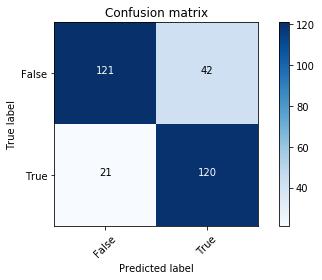

              precision    recall  f1-score   support

       False       0.85      0.74      0.79       163
        True       0.74      0.85      0.79       141

   micro avg       0.79      0.79      0.79       304
   macro avg       0.80      0.80      0.79       304
weighted avg       0.80      0.79      0.79       304



In [119]:
## Graphical visualization
cnf_matrix = confusion_matrix(test_labels, predicted_nn)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = test_labels, predictions = predicted_nn,
                      title='Confusion matrix')

In [108]:
## Graph the data
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

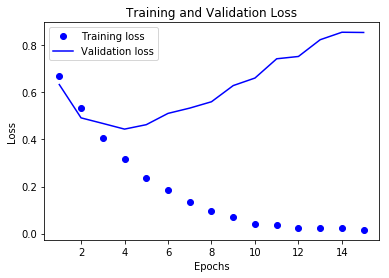

In [109]:
## Visualize training and validation loss
mse = history.history['acc']
val_mse = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mse) + 1)

plt.clf()   # clear figure
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

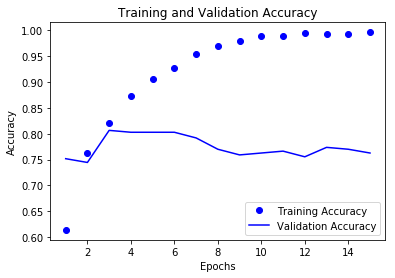

In [110]:
## Visualize training and validation accuracy
plt.clf()   # clear figure
mse = history.history['acc']
val_mse = history.history['val_acc']

plt.plot(epochs, mse, 'bo', label='Training Accuracy')
plt.plot(epochs, val_mse, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Bidirectional Long Short Term Memory

In [120]:
## Create the model
import operator # Finding vocabulary length, max dictionary index + 1
vocab_size = max(ix_to_word.items(), key=operator.itemgetter(1))[0] + 1
print("Vocabulary size:", vocab_size)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 30))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=(15),recurrent_dropout=0.3)))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

## Configured model with optimizer and loss function
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Vocabulary size: 6082
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 30)          182460    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30)                5520      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 188,011
Trainable params: 188,011
Non-trainable params: 0
_________________________________________________________________


In [121]:
## Train the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=80,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 2459 samples, validate on 274 samples
Epoch 1/5
2459/2459 [==============================] - 38s 16ms/step - loss: 0.6899 - acc: 0.5209 - val_loss: 0.6849 - val_acc: 0.5438
Epoch 2/5
2459/2459 [==============================] - 37s 15ms/step - loss: 0.6517 - acc: 0.6535 - val_loss: 0.5969 - val_acc: 0.7409
Epoch 3/5
2459/2459 [==============================] - 37s 15ms/step - loss: 0.5512 - acc: 0.7605 - val_loss: 0.5429 - val_acc: 0.7299
Epoch 4/5
2459/2459 [==============================] - 38s 15ms/step - loss: 0.4831 - acc: 0.7832 - val_loss: 0.4908 - val_acc: 0.7518
Epoch 5/5
2459/2459 [==============================] - 38s 15ms/step - loss: 0.4192 - acc: 0.8247 - val_loss: 0.4718 - val_acc: 0.7737


In [122]:
## Evaluate the model
predicted_nn = model.predict_classes(test_data)
results = model.evaluate(test_data, test_labels)
print("Test loss:", results[0])
print("Test Accuracy:", results[1])

304/304 [==============================] - 2s 7ms/step
Test loss: 0.5086274617596677
Test Accuracy: 0.7730263157894737


Confusion Matrix:
[[129  34]
 [ 35 106]]


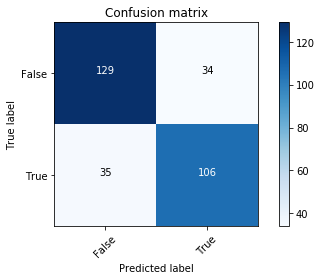

              precision    recall  f1-score   support

       False       0.79      0.79      0.79       163
        True       0.76      0.75      0.75       141

   micro avg       0.77      0.77      0.77       304
   macro avg       0.77      0.77      0.77       304
weighted avg       0.77      0.77      0.77       304



In [123]:
## Graphical visualization
cnf_matrix = confusion_matrix(test_labels, predicted_nn)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = test_labels, predictions = predicted_nn,
                      title='Confusion matrix')

In [46]:
## Graph the data
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

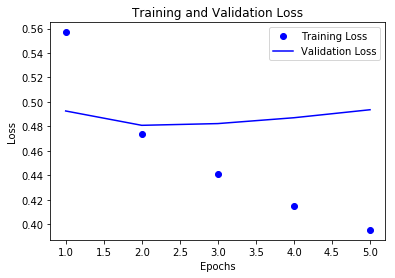

In [48]:
## Visualize training and validation loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()   # clear figure
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

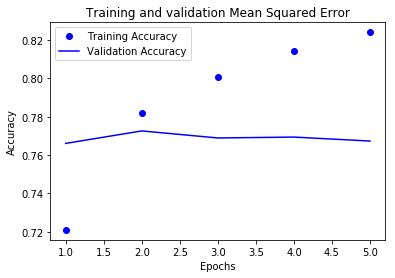

In [49]:
## Visualize training and validation accuracy
plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Other NN Approach

In [227]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [228]:
X = df[data_col]
Y = df[label_col]
train_data, test_data, train_labels, test_labels = train_test_split(
 X, Y, test_size=0.1, random_state=42, stratify=df[label_col])
print("Train data amount:", len(train_data))
print("Test data amount:", len(test_data))

Train data amount: 10053
Test data amount: 1117


In [230]:
## Initialize train and test data, train and test labels
num_data = len(df)
num_train = int(num_data * 0.9) # df.head this amount
num_test = int(num_data - num_train) # df.tail this amount
# train_data = df[data_col][:num_train]
# test_data = df[data_col][num_train:]
# train_labels = df[label_col][:num_train] # is_prompt_exists
# test_labels = df[label_col][num_train:]
## Get transformed version of train data
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)
word_index = tokenizer.word_index
vocab_size = len(word_index)
sequences = tokenizer.texts_to_sequences(train_data)
test_data = tokenizer.texts_to_sequences(test_data)
train_portion = sequences # for maxlength reference later
## Initiate validation sets
train_data, x_val, train_labels, y_val = train_test_split(
 sequences, train_labels, test_size=0.11, random_state=42, stratify=train_labels)
print("Train data amount:", len(train_data))
print("Validation data amount:", len(x_val))
print("Test data amount:", len(test_data))
# val_size = num_test # Set apart 10% of all data from train for validation
# x_val = sequences[num_train-val_size:num_train]
# train_data = sequences[:num_train-val_size]
# y_val = train_labels[num_train-val_size:num_train]
# train_labels = train_labels[:num_train-val_size]
# print("Number train data:", len(train_data))
# print("Number validation data:", len(x_val))
# print("Number test data:", len(test_data))

AttributeError: 'int' object has no attribute 'lower'

In [232]:
numabove = 0
max_length = 400
for i in range(len(train_portion)):
    if (len(train_portion[i]) > max_length):
        numabove = numabove + 1
print(len(train_portion))
print(numabove)

10053
29


In [233]:
# Pad train-val-test data
train_data = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
x_val = pad_sequences(x_val, maxlen=max_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')

In [234]:
embeddings_index = {}
f = open('glove.6B.300d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float32')
    except:
        pass
    embeddings_index[word] = coefs
f.close()

In [235]:
#create the embedding matrix mapping every index in the corpus to it's respective embedding_vector
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [246]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Conv1D(64, 5, activation='relu'),
#     tf.keras.layers.GlobalMaxPool1D(),
#     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,recurrent_dropout=0.4)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 300)          2599800   
_________________________________________________________________
dropout_8 (Dropout)          (None, 400, 300)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               541200    
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 3,141,301
Trainable params: 541,501
Non-trainable params: 2,599,800
_________________________________________________________________


In [250]:
## Train the model
# history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

history = model.fit(train_data,
                   train_labels,
                   epochs=5,
                   batch_size=150,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 8947 samples, validate on 1106 samples
Epoch 1/5
8947/8947 [==============================] - 153s 17ms/step - loss: 0.4062 - acc: 0.8213 - val_loss: 0.3704 - val_acc: 0.8418
Epoch 2/5
8947/8947 [==============================] - 153s 17ms/step - loss: 0.3847 - acc: 0.8328 - val_loss: 0.3773 - val_acc: 0.8400
Epoch 3/5
8947/8947 [==============================] - 153s 17ms/step - loss: 0.3801 - acc: 0.8353 - val_loss: 0.3569 - val_acc: 0.8499
Epoch 4/5
8947/8947 [==============================] - 154s 17ms/step - loss: 0.3670 - acc: 0.8441 - val_loss: 0.3509 - val_acc: 0.8544
Epoch 5/5
8947/8947 [==============================] - 153s 17ms/step - loss: 0.3573 - acc: 0.8453 - val_loss: 0.3447 - val_acc: 0.8590


In [248]:
## Evaluate the model
predicted_nn = model.predict_classes(test_data)
results = model.evaluate(test_data, test_labels)
print("Test loss:", results[0])
print("Test Accuracy:", results[1])

1117/1117 [==============================] - 15s 14ms/step
Test loss: 0.3492166290564951
Test Accuracy: 0.8460161138455998


Confusion Matrix:
[[455 104]
 [ 68 490]]


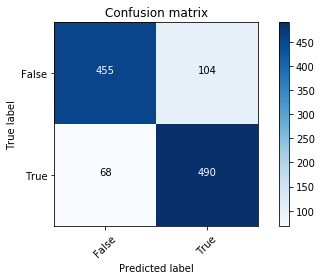

              precision    recall  f1-score   support

       False       0.87      0.81      0.84       559
        True       0.82      0.88      0.85       558

   micro avg       0.85      0.85      0.85      1117
   macro avg       0.85      0.85      0.85      1117
weighted avg       0.85      0.85      0.85      1117



In [249]:
## Graphical visualization
cnf_matrix = confusion_matrix(test_labels, predicted_nn)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = test_labels, predictions = predicted_nn,
                      title='Confusion matrix')